In [246]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
from wordcloud import WordCloud
plt.style.use('ggplot')

In [247]:
df = pd.read_csv('beforward_toyota_detailed.csv')

In [248]:
df.head(5)

,Car Make,Location,Chassis No,Version/Class,Model Code,Milleage,Engine Size (CC),Engine Code,Drive,Steering,Transmission,External Color,Registration Year/Month,Fuel,Manufacture Year/Month,Price($)
0,MITSUBISHI OUTLANDER,U.S.A,JA4AP4AU4KU013185,Sport SE FWD,4Cyl\nFind parts for this model code,"7,079 mile","2,000cc",-,2wheel drive,Left,Automatic,Red,2019/-,Petrol,2019/0,18080.0
1,MITSUBISHI LANCER,U.S.A,JA32U2FU8GU010814,ES FWD,4Cyl\nFind parts for this model code,"70,981 mile","2,400cc",-,2wheel drive,Left,CVT,Gray,2016/-,Petrol,2016/0,10398.0
2,MITSUBISHI DELICA D,OSAKA,CV1W-1112623,2.2D POWER PACKAGE 4WD,LDA-CV1W\nFind parts for this model code,"39,236 km","2,267cc",4N14,4wheel drive,Right,Automatic,Pearl,2017/3,Diesel,-,29030.0
3,MITSUBISHI ASX,UNITED KINGDOM,JMF1136,MANUAL DIESEL,0,"28,000 mile","1,800cc",-,4wheel drive,Right,Manual,White,2015/9,Diesel,-,12900.0
4,MITSUBISHI ASX,UNITED KINGDOM,JMF1137,MANUAL DIESEL,0,"32,161 mile","1,800cc",-,4wheel drive,Right,Manual,Silver,2015/1,Diesel,-,14200.0


In [249]:
df.columns = df.columns.str.lower()

In [250]:
df = df.sort_values('price($)')

In [251]:
df.columns

Index(['car make', 'location', 'chassis no', 'version/class', 'model code',
       'milleage', 'engine size (cc)', 'engine code', 'drive', 'steering',
       'transmission', 'external color', 'registration year/month', 'fuel',
       'manufacture year/month', 'price($)'],
      dtype='object')

In [252]:
df

,car make,location,chassis no,version/class,model code,milleage,engine size (cc),engine code,drive,steering,transmission,external color,registration year/month,fuel,manufacture year/month,price($)
408,NISSAN AD VAN,YOKOHAMA,VY12-182589,VE,DBF-VY12\nFind parts for this model code,"69,464 km","1,490cc",HR15,2wheel drive,Right,Automatic,White,2015/3,Petrol,2014/12,2040.0
403,NISSAN AD VAN,KYUSHU,VY12-192189,VE,DBF-VY12\nFind parts for this model code,"223,428 km","1,490cc",HR15,2wheel drive,Right,Automatic,White,2015/9,Petrol,2015/7,2079.0
402,NISSAN AD VAN,KYUSHU,VY12-192099,VE,DBF-VY12\nFind parts for this model code,"174,808 km","1,490cc",HR15,2wheel drive,Right,Automatic,White,2015/9,Petrol,2015/7,2177.0
401,NISSAN AD VAN,KYUSHU,VY12-192804,NaN,DBF-VY12\nFind parts for this model code,"106,224 km","1,490cc",HR15,2wheel drive,Right,Automatic,White,2015/9,Petrol,2015/8,2177.0
409,NISSAN MARCH,YOKOHAMA,NK13-016941,X FOUR V SELECTION,DBA-NK13\nFind parts for this model code,"80,203 km","1,190cc",HR12,4wheel drive,Right,Automatic,Silver,2017/6,Petrol,-,2501.0
1518,TOYOTA PROBOX VAN,NAGOYA,NSP160-0008909,DX COMFORT PACKAGE,DBE-NSP160V\nFind parts for this model code,"100,671 km","1,320cc",1NR,-,Right,Automatic,Yellow,2015/8,Petrol,2015/6,3011.0
466,NISSAN CLIPPER,YOKOHAMA,DR64V-809202,DX HIGHROOF,HBD-DR64V\nFind parts for this model code,"131,435 km",650cc,K6A,2wheel drive,Right,Automatic,Silver,2015/5,Petrol,-,3108.0
465,NISSAN CLIPPER,YOKOHAMA,DR64V-803097,DX HIGHROOF,HBD-DR64V\nFind parts for this model code,"131,474 km",650cc,K6A,2wheel drive,Right,Automatic,White,2015/4,Petrol,-,3108.0
1507,TOYOTA SUCCEED VAN,KYUSHU,NCP160-0021387,U,DBE-NCP160V\nFind parts for this model code,"89,071 km","1,490cc",1NZ,-,Right,Automatic,White,2015/6,Petrol,2015/5,3275.0
1514,TOYOTA PROBOX VAN,NAGOYA,NSP160-0009198,DX,DBE-NSP160V\nFind parts for this model code,"93,640 km","1,320cc",1NR,-,Right,Automatic,Silver,2015/7,Petrol,2015/7,3354.0


In [253]:
len(df.index)

2899

In [254]:
df.iloc[:2,:]

,car make,location,chassis no,version/class,model code,milleage,engine size (cc),engine code,drive,steering,transmission,external color,registration year/month,fuel,manufacture year/month,price($)
408,NISSAN AD VAN,YOKOHAMA,VY12-182589,VE,DBF-VY12\nFind parts for this model code,"69,464 km","1,490cc",HR15,2wheel drive,Right,Automatic,White,2015/3,Petrol,2014/12,2040.0
403,NISSAN AD VAN,KYUSHU,VY12-192189,VE,DBF-VY12\nFind parts for this model code,"223,428 km","1,490cc",HR15,2wheel drive,Right,Automatic,White,2015/9,Petrol,2015/7,2079.0


In [255]:
df_copy = df
np.sum(df_copy.isnull())

car make                     0
location                     0
chassis no                   0
version/class              538
model code                   0
milleage                     0
engine size (cc)             0
engine code                  0
drive                        0
steering                     0
transmission                 1
external color               1
registration year/month      1
fuel                         1
manufacture year/month       1
price($)                     1
dtype: int64

In [256]:
# drop version/class column
df_copy = df_copy.drop('version/class', axis=1)
np.sum(df_copy.isnull())

car make                   0
location                   0
chassis no                 0
model code                 0
milleage                   0
engine size (cc)           0
engine code                0
drive                      0
steering                   0
transmission               1
external color             1
registration year/month    1
fuel                       1
manufacture year/month     1
price($)                   1
dtype: int64

In [257]:
df_copy.tail(1)

,car make,location,chassis no,model code,milleage,engine size (cc),engine code,drive,steering,transmission,external color,registration year/month,fuel,manufacture year/month,price($)
2838,TOYOTA TOYOTA OTHERS,YOKOHAMA,8FD80-10591,8FD60\nFind parts for this model code,Diesel,"3,000cc",Automatic,2018,55148,NaN,NaN,NaN,NaN,NaN,NaN


In [258]:
df_clean = df_copy[np.isfinite(df_copy['price($)'])]
df_clean

,car make,location,chassis no,model code,milleage,engine size (cc),engine code,drive,steering,transmission,external color,registration year/month,fuel,manufacture year/month,price($)
408,NISSAN AD VAN,YOKOHAMA,VY12-182589,DBF-VY12\nFind parts for this model code,"69,464 km","1,490cc",HR15,2wheel drive,Right,Automatic,White,2015/3,Petrol,2014/12,2040.0
403,NISSAN AD VAN,KYUSHU,VY12-192189,DBF-VY12\nFind parts for this model code,"223,428 km","1,490cc",HR15,2wheel drive,Right,Automatic,White,2015/9,Petrol,2015/7,2079.0
402,NISSAN AD VAN,KYUSHU,VY12-192099,DBF-VY12\nFind parts for this model code,"174,808 km","1,490cc",HR15,2wheel drive,Right,Automatic,White,2015/9,Petrol,2015/7,2177.0
401,NISSAN AD VAN,KYUSHU,VY12-192804,DBF-VY12\nFind parts for this model code,"106,224 km","1,490cc",HR15,2wheel drive,Right,Automatic,White,2015/9,Petrol,2015/8,2177.0
409,NISSAN MARCH,YOKOHAMA,NK13-016941,DBA-NK13\nFind parts for this model code,"80,203 km","1,190cc",HR12,4wheel drive,Right,Automatic,Silver,2017/6,Petrol,-,2501.0
1518,TOYOTA PROBOX VAN,NAGOYA,NSP160-0008909,DBE-NSP160V\nFind parts for this model code,"100,671 km","1,320cc",1NR,-,Right,Automatic,Yellow,2015/8,Petrol,2015/6,3011.0
466,NISSAN CLIPPER,YOKOHAMA,DR64V-809202,HBD-DR64V\nFind parts for this model code,"131,435 km",650cc,K6A,2wheel drive,Right,Automatic,Silver,2015/5,Petrol,-,3108.0
465,NISSAN CLIPPER,YOKOHAMA,DR64V-803097,HBD-DR64V\nFind parts for this model code,"131,474 km",650cc,K6A,2wheel drive,Right,Automatic,White,2015/4,Petrol,-,3108.0
1507,TOYOTA SUCCEED VAN,KYUSHU,NCP160-0021387,DBE-NCP160V\nFind parts for this model code,"89,071 km","1,490cc",1NZ,-,Right,Automatic,White,2015/6,Petrol,2015/5,3275.0
1514,TOYOTA PROBOX VAN,NAGOYA,NSP160-0009198,DBE-NSP160V\nFind parts for this model code,"93,640 km","1,320cc",1NR,-,Right,Automatic,Silver,2015/7,Petrol,2015/7,3354.0


In [259]:
np.sum(df_clean.isnull())

car make                   0
location                   0
chassis no                 0
model code                 0
milleage                   0
engine size (cc)           0
engine code                0
drive                      0
steering                   0
transmission               0
external color             0
registration year/month    0
fuel                       0
manufacture year/month     0
price($)                   0
dtype: int64

In [260]:
len(df_clean.index)

2898

In [261]:
# functions to clean columns of the data frame
def getMakes(str_list):
    return str_list.strip().split(' ')[0]
     
def cleanYear(year):
    try:
        return int(str(year)[:4])
    except:
        return 0

def cleanModelCode(code):
    return code.strip().split('\n')[0]
   
def getIntFromString(val):
    try:
        temp = re.findall('\d+', val)
        temp = ''.join(temp)
        return int(temp)
    except:
        return 0
    
def removeSpaces(str_val):
    return str_val.strip()

In [262]:
df_clean['car make'].unique()

array([' NISSAN AD VAN', ' NISSAN MARCH', ' TOYOTA PROBOX VAN',
       ' NISSAN CLIPPER', ' TOYOTA SUCCEED VAN', ' NISSAN NOTE',
       ' TOYOTA AQUA', ' NISSAN DAYZ', ' MITSUBISHI MINICAB VAN',
       ' TOYOTA COROLLA AXIO', ' HONDA ACTY VAN', ' NISSAN TEANA',
       ' HONDA FIT', ' HONDA JAZZ', ' TOYOTA VITZ',
       ' MITSUBISHI MINICAB TRUCK', ' TOYOTA COROLLA FIELDER',
       ' NISSAN DAYZ ROOX', ' MITSUBISHI LANCER', ' TOYOTA PIXIS EPOCH',
       ' MITSUBISHI EK WAGON', ' NISSAN SYLPHY', ' HONDA N BOX',
       ' TOYOTA LITEACE VAN', ' NISSAN VERSA', ' TOYOTA SPADE',
       ' TOYOTA PASSO', ' MITSUBISHI EK SPACE', ' TOYOTA HIACE VAN',
       ' NISSAN NVVANETTE WAGON', ' NISSAN BLUEBIRD SYLPHY',
       ' NISSAN PATHFINDER', ' HONDA VAMOS', ' TOYOTA PIXIS TRUCK',
       ' TOYOTA VOXY', ' TOYOTA WISH', ' TOYOTA VIOS', ' MITSUBISHI ASX',
       ' TOYOTA PIXIS VAN', ' TOYOTA SUCCEED', ' HONDA N-WGN',
       ' TOYOTA COROLLA ALTIS', ' TOYOTA NOAH', ' TOYOTA CAMRY',
       ' HONDA FIT HY

In [263]:
df_clean.head(100)

,car make,location,chassis no,model code,milleage,engine size (cc),engine code,drive,steering,transmission,external color,registration year/month,fuel,manufacture year/month,price($)
408,NISSAN AD VAN,YOKOHAMA,VY12-182589,DBF-VY12\nFind parts for this model code,"69,464 km","1,490cc",HR15,2wheel drive,Right,Automatic,White,2015/3,Petrol,2014/12,2040.0
403,NISSAN AD VAN,KYUSHU,VY12-192189,DBF-VY12\nFind parts for this model code,"223,428 km","1,490cc",HR15,2wheel drive,Right,Automatic,White,2015/9,Petrol,2015/7,2079.0
402,NISSAN AD VAN,KYUSHU,VY12-192099,DBF-VY12\nFind parts for this model code,"174,808 km","1,490cc",HR15,2wheel drive,Right,Automatic,White,2015/9,Petrol,2015/7,2177.0
401,NISSAN AD VAN,KYUSHU,VY12-192804,DBF-VY12\nFind parts for this model code,"106,224 km","1,490cc",HR15,2wheel drive,Right,Automatic,White,2015/9,Petrol,2015/8,2177.0
409,NISSAN MARCH,YOKOHAMA,NK13-016941,DBA-NK13\nFind parts for this model code,"80,203 km","1,190cc",HR12,4wheel drive,Right,Automatic,Silver,2017/6,Petrol,-,2501.0
1518,TOYOTA PROBOX VAN,NAGOYA,NSP160-0008909,DBE-NSP160V\nFind parts for this model code,"100,671 km","1,320cc",1NR,-,Right,Automatic,Yellow,2015/8,Petrol,2015/6,3011.0
466,NISSAN CLIPPER,YOKOHAMA,DR64V-809202,HBD-DR64V\nFind parts for this model code,"131,435 km",650cc,K6A,2wheel drive,Right,Automatic,Silver,2015/5,Petrol,-,3108.0
465,NISSAN CLIPPER,YOKOHAMA,DR64V-803097,HBD-DR64V\nFind parts for this model code,"131,474 km",650cc,K6A,2wheel drive,Right,Automatic,White,2015/4,Petrol,-,3108.0
1507,TOYOTA SUCCEED VAN,KYUSHU,NCP160-0021387,DBE-NCP160V\nFind parts for this model code,"89,071 km","1,490cc",1NZ,-,Right,Automatic,White,2015/6,Petrol,2015/5,3275.0
1514,TOYOTA PROBOX VAN,NAGOYA,NSP160-0009198,DBE-NSP160V\nFind parts for this model code,"93,640 km","1,320cc",1NR,-,Right,Automatic,Silver,2015/7,Petrol,2015/7,3354.0


In [264]:
# clean columns values
df_clean[['registration year/month']] = df_clean[['registration year/month']].applymap(cleanYear)
df_clean[['manufacture year/month']] = df_clean[['manufacture year/month']].applymap(cleanYear)
df_clean['makes'] = df_clean['car make'].apply(getMakes)
df_clean['model code'] = df_clean['model code'].apply(cleanModelCode)
df_clean['milleage'] = df_clean['milleage'].apply(getIntFromString)
df_clean['engine size (cc)'] = df_clean['engine size (cc)'].apply(getIntFromString)
df_clean['car make'] = df_clean['car make'].apply(removeSpaces)
df_clean.head(100)

/Users/babu/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/babu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/babu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

,car make,location,chassis no,model code,milleage,engine size (cc),engine code,drive,steering,transmission,external color,registration year/month,fuel,manufacture year/month,price($),makes
408,NISSAN AD VAN,YOKOHAMA,VY12-182589,DBF-VY12,69464,1490,HR15,2wheel drive,Right,Automatic,White,2015,Petrol,2014,2040.0,NISSAN
403,NISSAN AD VAN,KYUSHU,VY12-192189,DBF-VY12,223428,1490,HR15,2wheel drive,Right,Automatic,White,2015,Petrol,2015,2079.0,NISSAN
402,NISSAN AD VAN,KYUSHU,VY12-192099,DBF-VY12,174808,1490,HR15,2wheel drive,Right,Automatic,White,2015,Petrol,2015,2177.0,NISSAN
401,NISSAN AD VAN,KYUSHU,VY12-192804,DBF-VY12,106224,1490,HR15,2wheel drive,Right,Automatic,White,2015,Petrol,2015,2177.0,NISSAN
409,NISSAN MARCH,YOKOHAMA,NK13-016941,DBA-NK13,80203,1190,HR12,4wheel drive,Right,Automatic,Silver,2017,Petrol,0,2501.0,NISSAN
1518,TOYOTA PROBOX VAN,NAGOYA,NSP160-0008909,DBE-NSP160V,100671,1320,1NR,-,Right,Automatic,Yellow,2015,Petrol,2015,3011.0,TOYOTA
466,NISSAN CLIPPER,YOKOHAMA,DR64V-809202,HBD-DR64V,131435,650,K6A,2wheel drive,Right,Automatic,Silver,2015,Petrol,0,3108.0,NISSAN
465,NISSAN CLIPPER,YOKOHAMA,DR64V-803097,HBD-DR64V,131474,650,K6A,2wheel drive,Right,Automatic,White,2015,Petrol,0,3108.0,NISSAN
1507,TOYOTA SUCCEED VAN,KYUSHU,NCP160-0021387,DBE-NCP160V,89071,1490,1NZ,-,Right,Automatic,White,2015,Petrol,2015,3275.0,TOYOTA
1514,TOYOTA PROBOX VAN,NAGOYA,NSP160-0009198,DBE-NSP160V,93640,1320,1NR,-,Right,Automatic,Silver,2015,Petrol,2015,3354.0,TOYOTA


In [265]:
df_clean = df_clean[df_clean['engine size (cc)'] >= 600]
df_clean = df_clean[df_clean['drive'] != '-']
df_clean = df_clean[df_clean['fuel'] != 'Other']
df_clean = df_clean[df_clean['external color'] != 'Other']

In [266]:
make_group = df_clean.groupby('makes')

HONDA
----------------------------------------------------------------------
376


MITSUBISHI
----------------------------------------------------------------------
394


NISSAN
----------------------------------------------------------------------
683


TOYOTA
----------------------------------------------------------------------
1308




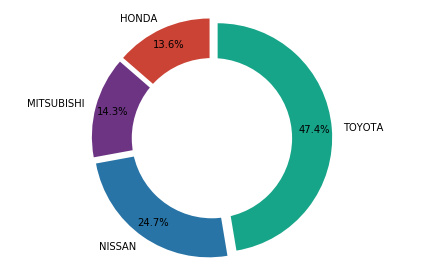

[0.05, 0.05, 0.05, 0.05]

In [267]:
labels = []
sizes = []
for key, values in make_group:
    print(key) #this indicates the grouping
    labels.append(key)
    sizes.append(values.shape[0])
    print('-'*70)
#     print(values) #this is a dataframe for that 
    print(values.shape[0])
    print('\n')

# Pie chart
colors = ['#CB4335','#6C3483','#2874A6','#17A589']
def drawPieChart(labels, sizes, colors):  
#     explode = (0.05,0.05,0.05,0.05)
    explode = list(map(lambda c: float(c) ,('0.05 ' * len(sizes)).strip().split(' ')))

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

    centre_circle = plt.Circle((0,0),0.70,fc='white')

    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    ax1.axis('equal')  
    plt.tight_layout()
    plt.show()
    
drawPieChart(labels,sizes,colors)

list(map(lambda c: float(c) ,('0.05 ' * len(sizes)).strip().split(' ')))

2015
----------------------------------------------------------------------
724


2016
----------------------------------------------------------------------
725


2017
----------------------------------------------------------------------
632


2018
----------------------------------------------------------------------
462


2019
----------------------------------------------------------------------
218




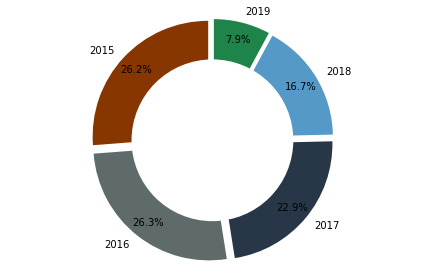

In [268]:
year_group = df_clean.groupby('registration year/month')
year_labels = []
year_sizes = []
for key, values in year_group:
    print(key) #this indicates the grouping
    year_labels.append(key)
    year_sizes.append(values.shape[0])
    print('-'*70)
    print(values.shape[0])
    print('\n')
    
year_colors = ['#873600', '#5F6A6A','#283747','#5499C7','#1E8449']
drawPieChart(year_labels, year_sizes, year_colors)

In [269]:
for item in year_group:
    print(item)

(2015,                          car make        location         chassis no  \
408                 NISSAN AD VAN        YOKOHAMA        VY12-182589   
403                 NISSAN AD VAN          KYUSHU        VY12-192189   
402                 NISSAN AD VAN          KYUSHU        VY12-192099   
401                 NISSAN AD VAN          KYUSHU        VY12-192804   
466                NISSAN CLIPPER        YOKOHAMA       DR64V-809202   
465                NISSAN CLIPPER        YOKOHAMA       DR64V-803097   
979                NISSAN CLIPPER            KOBE       DR64V-810526   
680                NISSAN CLIPPER        YOKOHAMA       DR17V-105012   
969                   NISSAN DAYZ        YOKOHAMA       B21W-0225407   
276        MITSUBISHI MINICAB VAN          NAGOYA       DS17V-102252   
800                   NISSAN NOTE          NAGOYA         E12-306515   
1229               HONDA ACTY VAN        HOKKAIDO        HH6-2000734   
973                 NISSAN AD VAN        YOKOHAMA      VZ

In [270]:
year_group.size()

registration year/month
2015    724
2016    725
2017    632
2018    462
2019    218
dtype: int64

In [271]:
make_group.size()

makes
HONDA          376
MITSUBISHI     394
NISSAN         683
TOYOTA        1308
dtype: int64

In [272]:
make_year_group = df_clean.groupby(['makes', 'registration year/month'])

In [273]:
make_year_group.size()

makes       registration year/month
HONDA       2015                       113
            2016                       132
            2017                        71
            2018                        44
            2019                        16
MITSUBISHI  2015                       110
            2016                        93
            2017                        88
            2018                        95
            2019                         8
NISSAN      2015                       186
            2016                       168
            2017                       175
            2018                       108
            2019                        46
TOYOTA      2015                       315
            2016                       332
            2017                       298
            2018                       215
            2019                       148
dtype: int64

In [274]:
car_make_year_group = df_clean.groupby(['car make','engine size (cc)','registration year/month'])

In [275]:
car_make_year_group.size()

car make            engine size (cc)  registration year/month
HONDA ACCORD        1500              2015                        1
                                      2018                        2
                    1996              2017                        1
                    2354              2015                        1
                    2356              2015                       12
                                      2016                        6
                                      2017                        9
                    2400              2015                        7
                                      2016                       22
                                      2017                        8
                    3471              2017                        1
                    3500              2015                        2
                                      2016                        2
HONDA ACCORD COUPE  1500              2016            

In [276]:
df_clean.describe()

,milleage,engine size (cc),registration year/month,manufacture year/month,price($)
count,2761.000000,2761.000000,2761.000000,2761.000000,2761.000000
mean,37750.494748,2254.191597,2016.538211,800.580225,21663.261499
std,31278.863591,861.417821,1.257761,986.928149,11911.744099
min,0.000000,600.000000,2015.000000,0.000000,2040.000000
25%,16000.000000,1600.000000,2015.000000,0.000000,15117.000000
50%,32076.000000,2350.000000,2016.000000,0.000000,19167.000000
75%,49821.000000,2500.000000,2017.000000,2016.000000,25942.000000
max,405971.000000,16000.000000,2019.000000,2019.000000,233608.000000


In [277]:
car_make_year_group.agg(['count', 'min', 'max', 'mean', 'std'])

milleage         \
                                                               count    min   
car make           engine size (cc) registration year/month                   
HONDA ACCORD       1500             2015                           1  34265   
                                    2018                           2  29554   
                   1996             2017                           1  32062   
                   2354             2015                           1  52761   
                   2356             2015                          12   3883   
                                    2016                           6  21699   
                                    2017                           9  16000   
                   2400             2015                           7  45150   
                                    2016                          22   9076   
                                    2017                           8  22392   
                   3471             2017                           1  46461   
                   3500             2015                           2  26127   
                                    2016                           2  25958   
HONDA ACCORD COUPE 1500             2016                           1  31490   
                   2400             2015                           1  21619   
                                    2016                           1  43157   
HONDA ACTY TRUCK   650              2019                           1   3000   
HONDA ACTY VAN     650              2015                           1  54000   
HONDA CIVIC        1000             2019                           4   2587   
                   1500             2016                           9  21255   
                                    2017                           7   1461   
                                    2018                           3  12848   
                   1597             2016                           1  36400   
                   1598             2015                           1  33000   
                   1800             2015                           5  29593   
                   2000             2016                          16  20206   
                                    2017                           1  30140   
                                    2018                          12   7686   
                                    2019                           3    647   
                   2400             2016                           1  46825   
...                                                              ...    ...   
TOYOTA VELLFIRE    2490             2017                           5  13000   
                                    2019                           1   5000   
                   2500             2015                           1  28000   
                                    2016                           2   9000   
                                    2017                           4   6000   
                                    2018                           3   6399   
                   3450             2018                           1    401   
TOYOTA VITZ        990              2016                           1  42837   
                   1000             2015                           1  37000   
                   1300             2016                           1  12000   
                                    2018                           2   9000   
                   1320             2015                           1  43256   
                                    2016                           1  69529   
                   1329             2015                           1  22380   
                   1490             2016                           1  17000   
                                    2017                           1  23000   
TOYOTA VOXY        1800             2015                           2  44125   
                   1980        

In [278]:
df['car make'].value_counts()

 TOYOTA RAV                249
 TOYOTA HILUX              220
 MITSUBISHI ASX            130
 NISSAN ROGUE              111
 MITSUBISHI OUTLANDER       97
 NISSAN ALTIMA              97
 MITSUBISHI L               85
 NISSAN QASHQAI             85
 TOYOTA CAMRY               82
 TOYOTA COROLLA             78
 HONDA ACCORD               74
 TOYOTA LAND CRUISER        72
 NISSAN X-TRAIL             67
 TOYOTA PRIUS               66
 TOYOTA HIGHLANDER          64
 HONDA CIVIC                64
 HONDA CR-V                 61
 HONDA N BOX                54
 NISSAN NAVARA              54
 NISSAN VERSA               43
 TOYOTA RUNNER              41
 TOYOTA TACOMA              40
 TOYOTA HIACE VAN           39
 TOYOTA ALPHARD             33
 NISSAN SENTRA              31
 NISSAN NOTE                29
 TOYOTA                     27
 HONDA FIT                  27
 HONDA VEZEL                26
 MITSUBISHI SHOGUN          25
                          ... 
 TOYOTA PIXIS VAN            1
 NISSAN 

In [279]:
df_clean['external color'].value_counts()

Black     659
White     591
Gray      397
Silver    381
Blue      221
Pearl     180
Red       170
Brown      72
Green      25
Purple     21
Yellow     15
Maroon     10
Pink        6
Gold        6
Orange      4
Beige       3
Name: external color, dtype: int64

In [280]:
df_clean['steering'].value_counts()

Right    1657
Left     1104
Name: steering, dtype: int64

In [281]:
make_steering_group = df_clean.groupby(['makes','steering'])
for item in make_steering_group:
    print(item)

(('HONDA', 'Left'),                 car make location          chassis no model code  milleage  \
1496           HONDA FIT  Georgia   3HGGK5H42JM731087          0     22530   
1116        HONDA ACCORD    U.S.A        STOCKA126428       4Cyl     78992   
1168        HONDA ACCORD    U.S.A   1HGCR2F59FA058095      sport     64900   
1299           HONDA FIT    U.S.A   3HGGK5G55FM767700       4Cyl     52439   
1115        HONDA ACCORD    U.S.A        STOCKA021876       4Cyl    119055   
1144        HONDA ACCORD    U.S.A   1HGCR2F51GA236289       4Cyl    101031   
1438        HONDA ACCORD    U.S.A        STOCKA227599       4Cyl     23045   
1437        HONDA ACCORD    U.S.A        STOCKA242995       4Cyl     49078   
1428         HONDA CIVIC    U.S.A   19XFB2F52FE116898       4Cyl     75299   
1404        HONDA ACCORD   INCHON   1HGCR2680FA511858          0    112661   
1490        HONDA ACCORD    U.S.A   1HGCR2F53FA119893      SPORT     45788   
1386        HONDA ACCORD   INCHON   1HGCR268

In [282]:
(df.sort_values('price($)')).iloc[0,-1]

2040.0

In [283]:
make_steering_group.size()

makes       steering
HONDA       Left        180
            Right       196
MITSUBISHI  Left         29
            Right       365
NISSAN      Left        356
            Right       327
TOYOTA      Left        539
            Right       769
dtype: int64

In [284]:
make_location_group = df_clean.groupby(['location', 'makes'])
make_location_group.size()

location        makes     
BUSAN MASAN     NISSAN          3
                TOYOTA          3
Dubai           MITSUBISHI      4
                NISSAN          2
                TOYOTA         98
Georgia         HONDA           1
                TOYOTA          6
HOKKAIDO        HONDA           8
                MITSUBISHI      1
                NISSAN         18
                TOYOTA         38
INCHON          HONDA          41
                NISSAN         53
                TOYOTA        113
KOBE            HONDA          13
                MITSUBISHI      2
                NISSAN          6
                TOYOTA         33
KYOTO           HONDA           3
                MITSUBISHI      1
                NISSAN          1
                TOYOTA          4
KYUSHU          HONDA          19
                MITSUBISHI      3
                NISSAN         23
                TOYOTA         50
NAGOYA          HONDA          12
                MITSUBISHI      3
                NISSA

In [285]:
# renaming columns
df_clean.rename(columns = {'milleage (km)' :'milleage', 'registration year/month' : 'registration_year',\
                          'manufacture year/month' :'manufacture_year', 'price($)': 'price'}, inplace=True)
df_clean.columns

Index(['car make', 'location', 'chassis no', 'model code', 'milleage',
       'engine size (cc)', 'engine code', 'drive', 'steering', 'transmission',
       'external color', 'registration_year', 'fuel', 'manufacture_year',
       'price', 'makes'],
      dtype='object')

In [286]:
make_color_group = df_clean.groupby(['makes', 'external color'])
make_color_group.size()

makes       external color
HONDA       Black             100
            Blue               36
            Brown               8
            Gold                1
            Gray               49
            Green               3
            Orange              1
            Pearl              36
            Purple              8
            Red                27
            Silver             41
            White              63
            Yellow              3
MITSUBISHI  Black              83
            Blue               27
            Brown              27
            Gray               64
            Green               3
            Pearl               2
            Purple              1
            Red                35
            Silver             59
            White              93
NISSAN      Beige               1
            Black             150
            Blue               65
            Brown              11
            Gold                2
            Gray     

In [287]:
df_clean.columns

Index(['car make', 'location', 'chassis no', 'model code', 'milleage',
       'engine size (cc)', 'engine code', 'drive', 'steering', 'transmission',
       'external color', 'registration_year', 'fuel', 'manufacture_year',
       'price', 'makes'],
      dtype='object')

In [288]:
%matplotlib inline
df_time_series = df_clean
df_time_series = df_time_series.set_index('registration_year')


locations = df_clean['location']
locations = locations.unique()

# for loc in locations:
#     df_time_series[df_time_series['location'] == loc].price.plot()

# df_time_series[df_time_series['makes'] == 'NISSAN'].price.plot()  
# df_time_series[df_time_series['makes'] == 'TOYOTA'].price.plot() 
# df_time_series[df_time_series['makes'] == 'HONDA'].price.plot() 
# df_time_series[df_time_series['makes'] == 'MITSUBISHI'].price.plot() 

# df_time_series[df_time_series['location'] == 'KYUSHU'].price.plot() 

In [289]:
# df2['year'] = pd.to_datetime(df2['year'],  format='%Y', errors='ignore')

In [290]:
df_time_series.loc[2015]

,car make,location,chassis no,model code,milleage,engine size (cc),engine code,drive,steering,transmission,external color,fuel,manufacture_year,price,makes
registration_year,,,,,,,,,,,,,,,
2015,NISSAN AD VAN,YOKOHAMA,VY12-182589,DBF-VY12,69464,1490,HR15,2wheel drive,Right,Automatic,White,Petrol,2014,2040.0,NISSAN
2015,NISSAN AD VAN,KYUSHU,VY12-192189,DBF-VY12,223428,1490,HR15,2wheel drive,Right,Automatic,White,Petrol,2015,2079.0,NISSAN
2015,NISSAN AD VAN,KYUSHU,VY12-192099,DBF-VY12,174808,1490,HR15,2wheel drive,Right,Automatic,White,Petrol,2015,2177.0,NISSAN
2015,NISSAN AD VAN,KYUSHU,VY12-192804,DBF-VY12,106224,1490,HR15,2wheel drive,Right,Automatic,White,Petrol,2015,2177.0,NISSAN
2015,NISSAN CLIPPER,YOKOHAMA,DR64V-809202,HBD-DR64V,131435,650,K6A,2wheel drive,Right,Automatic,Silver,Petrol,0,3108.0,NISSAN
2015,NISSAN CLIPPER,YOKOHAMA,DR64V-803097,HBD-DR64V,131474,650,K6A,2wheel drive,Right,Automatic,White,Petrol,0,3108.0,NISSAN
2015,NISSAN CLIPPER,KOBE,DR64V-810526,HBD-DR64V,166000,650,K6A,2wheel drive,Right,Automatic,Silver,Petrol,0,3579.0,NISSAN
2015,NISSAN CLIPPER,YOKOHAMA,DR17V-105012,HBD-DR17V,115958,650,R06A,2wheel drive,Right,Automatic,White,Petrol,0,4118.0,NISSAN
2015,NISSAN DAYZ,YOKOHAMA,B21W-0225407,DBA-B21W,27743,650,3B20,2wheel drive,Right,Automatic,Silver,Petrol,0,4314.0,NISSAN


In [291]:
df_time_series.loc[2019].groupby('location').size()

location
Dubai              12
INCHON              4
KOBE                7
KYUSHU              5
NAGOYA              5
OSAKA              13
Thailand           39
U.S.A             112
UNITED KINGDOM     10
YOKOHAMA           11
dtype: int64

In [292]:
df50 = df_clean.head(50)

(array([ 37., 224., 562., 735., 446., 345., 162., 112.,  42.,  28.,  17.,
         13.,   8.,   3.,  15.,   6.,   1.,   0.,   1.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   1.]),
 array([  2040.  ,   6671.36,  11302.72,  15934.08,  20565.44,  25196.8 ,
         29828.16,  34459.52,  39090.88,  43722.24,  48353.6 ,  52984.96,
         57616.32,  62247.68,  66879.04,  71510.4 ,  76141.76,  80773.12,
         85404.48,  90035.84,  94667.2 ,  99298.56, 103929.92, 108561.28,
        113192.64, 117824.  , 122455.36, 127086.72, 131718.08, 136349.44,
        140980.8 , 145612.16, 150243.52, 154874.88, 159506.24, 164137.6 ,
        168768.96, 173400.32, 178031.68, 182663.04, 187294.4 , 191925.76,
        196557.12, 201188.48, 205819.84, 210451.2 , 215082.56, 219713.92,
        224345.28, 228976.64, 233608.  ]),
 <a list of 50 Patch ob

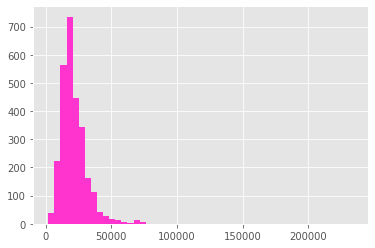

In [293]:
plt.hist(df_time_series['price'], bins=50, color="#FF33CE")

Text(0.5, 1.0, 'Histogram: CC vs Number')

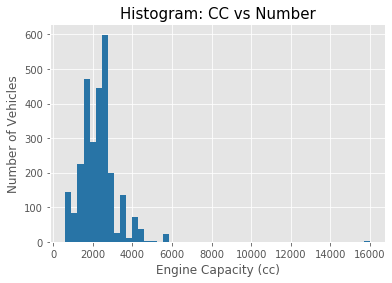

In [294]:
plt.hist(df_clean['engine size (cc)'], bins=50, color="#2874A6")
plt.xlabel('Engine Capacity (cc)')
plt.ylabel('Number of Vehicles')
plt.title('Histogram: CC vs Number', fontsize=15)

Text(0.5, 1.0, 'Histogram: Log (Price) vs Number')

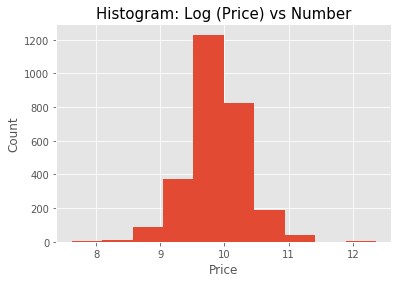

In [295]:
log_price = np.log(df_clean['price'])
log_price.plot.hist()
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Histogram: Log (Price) vs Number', fontsize=15)

Text(0.5, 1.0, 'Histogram Price of Vehicles')

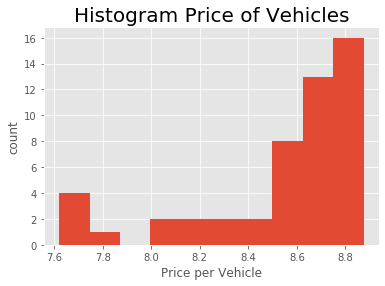

In [296]:
log_price = np.log(df50['price'])
log_price.plot.hist()
plt.xlabel('Price per Vehicle')
plt.ylabel('count')
plt.title('Histogram Price of Vehicles', fontsize=20)

In [297]:
df_time_series[df_time_series['price'] <= 12000]

,car make,location,chassis no,model code,milleage,engine size (cc),engine code,drive,steering,transmission,external color,fuel,manufacture_year,price,makes
registration_year,,,,,,,,,,,,,,,
2015,NISSAN AD VAN,YOKOHAMA,VY12-182589,DBF-VY12,69464,1490,HR15,2wheel drive,Right,Automatic,White,Petrol,2014,2040.0,NISSAN
2015,NISSAN AD VAN,KYUSHU,VY12-192189,DBF-VY12,223428,1490,HR15,2wheel drive,Right,Automatic,White,Petrol,2015,2079.0,NISSAN
2015,NISSAN AD VAN,KYUSHU,VY12-192099,DBF-VY12,174808,1490,HR15,2wheel drive,Right,Automatic,White,Petrol,2015,2177.0,NISSAN
2015,NISSAN AD VAN,KYUSHU,VY12-192804,DBF-VY12,106224,1490,HR15,2wheel drive,Right,Automatic,White,Petrol,2015,2177.0,NISSAN
2017,NISSAN MARCH,YOKOHAMA,NK13-016941,DBA-NK13,80203,1190,HR12,4wheel drive,Right,Automatic,Silver,Petrol,0,2501.0,NISSAN
2015,NISSAN CLIPPER,YOKOHAMA,DR64V-809202,HBD-DR64V,131435,650,K6A,2wheel drive,Right,Automatic,Silver,Petrol,0,3108.0,NISSAN
2015,NISSAN CLIPPER,YOKOHAMA,DR64V-803097,HBD-DR64V,131474,650,K6A,2wheel drive,Right,Automatic,White,Petrol,0,3108.0,NISSAN
2016,TOYOTA PROBOX VAN,KYUSHU,NCP160-0053628,DBE-NCP160V,91750,1490,1NZ,2wheel drive,Right,Automatic,Blue,Petrol,2016,3427.0,TOYOTA
2015,NISSAN CLIPPER,KOBE,DR64V-810526,HBD-DR64V,166000,650,K6A,2wheel drive,Right,Automatic,Silver,Petrol,0,3579.0,NISSAN


Text(0.5, 1.0, 'Scatter Plot of Price vs Mileage')

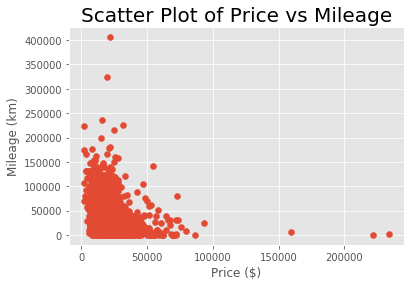

In [298]:
plt.scatter(df_clean['price'], df_clean['milleage'])
plt.xlabel('Price ($)')
plt.ylabel('Mileage (km)')
plt.title('Scatter Plot of Price vs Mileage', fontsize=20)

Text(0.5, 1.0, 'Scatter Plot of Price vs Engine Capacity')

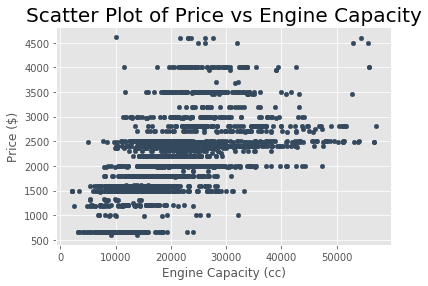

In [299]:
# removing outliers
scatter_engine_df = df_clean[['price','engine size (cc)']]
scatter_engine_df = scatter_engine_df.loc[scatter_engine_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

scatter_engine_df.plot(kind='scatter',x='price', y='engine size (cc)', c='#34495E')
plt.xlabel('Engine Capacity (cc)')
plt.ylabel('Price ($)')
plt.title('Scatter Plot of Price vs Engine Capacity', fontsize=20)

Text(0.5, 1.0, 'Scatter Plot of Price vs Engine Capacity')

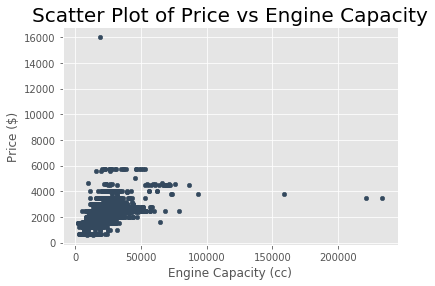

In [300]:
df_clean.plot(kind='scatter',x='price', y='engine size (cc)', c='#34495E')
plt.xlabel('Engine Capacity (cc)')
plt.ylabel('Price ($)')
plt.title('Scatter Plot of Price vs Engine Capacity', fontsize=20)

In [301]:
# removing outliers
scatter_df = df_clean[['price','milleage']]
scatter_df = scatter_df.loc[scatter_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

Text(0.5, 1.0, 'Scatter Plot of Price vs Mileage')

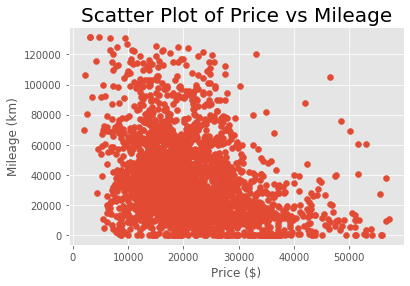

In [302]:
plt.scatter(scatter_df['price'], scatter_df['milleage'])
plt.xlabel('Price ($)')
plt.ylabel('Mileage (km)')
plt.title('Scatter Plot of Price vs Mileage', fontsize=20)

In [303]:
outliers = df_clean[['price', 'milleage']].dropna()

In [304]:
outliers.shape

(2761, 2)

In [305]:
outliers = outliers.loc[outliers.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

In [306]:
outliers.shape

(2683, 2)

In [307]:
outliers = outliers.loc[~outliers.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

In [308]:
outliers.shape

(65, 2)

In [309]:
outliers

,price,milleage
466,3108.0,131435
465,3108.0,131474
680,4118.0,115958
800,4795.0,131390
2012,6677.0,123000
1060,6735.0,131136
1058,7249.0,120071
115,8000.0,125000
989,9433.0,130700
988,9857.0,126934


Text(0, 0.5, 'Milleage')

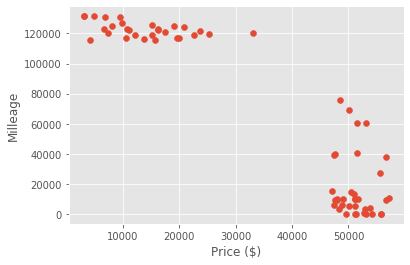

In [310]:
plt.scatter(outliers['price'], outliers['milleage'])
plt.xlabel('Price ($)')
plt.ylabel('Milleage')

In [311]:
outliers.merge(df_clean, how='left', left_index=True, right_index=True, suffixes=['', '_y'])[['price','milleage','car make', 'location', 'registration_year']].\
sort_values(by='price', ascending=True)



,price,milleage,car make,location,registration_year
466,3108.0,131435,NISSAN CLIPPER,YOKOHAMA,2015
465,3108.0,131474,NISSAN CLIPPER,YOKOHAMA,2015
680,4118.0,115958,NISSAN CLIPPER,YOKOHAMA,2015
800,4795.0,131390,NISSAN NOTE,NAGOYA,2015
2012,6677.0,123000,TOYOTA LITEACE VAN,YOKOHAMA,2015
1060,6735.0,131136,NISSAN VERSA,U.S.A,2015
1058,7249.0,120071,NISSAN VERSA,U.S.A,2015
115,8000.0,125000,MITSUBISHI ASX,UNITED KINGDOM,2015
989,9433.0,130700,NISSAN QASHQAI,INCHON,2015
988,9857.0,126934,NISSAN QASHQAI,INCHON,2015


In [312]:
outliers.shape

(65, 2)

Text(0.5, 1.0, 'Scatter Plot of Price vs Car make + Color')

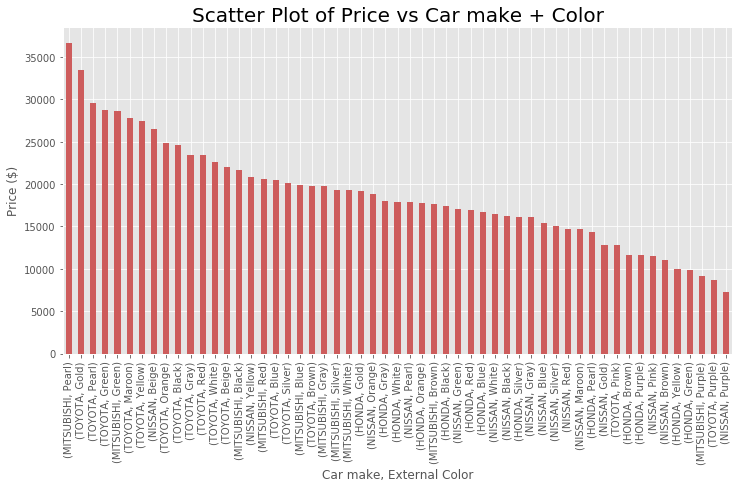

In [313]:
plt.figure(figsize=(12,6))
df_clean.groupby(['makes', 'external color'])['price'].median().sort_values(ascending = False).plot.bar(color='#CD5C5C')
plt.xlabel('Car make, External Color')
plt.ylabel('Price ($)')
plt.title('Scatter Plot of Price vs Car make + Color', fontsize=20)

Text(0.5, 1.0, 'Scatter Plot of Price vs Car make, Registration Year')

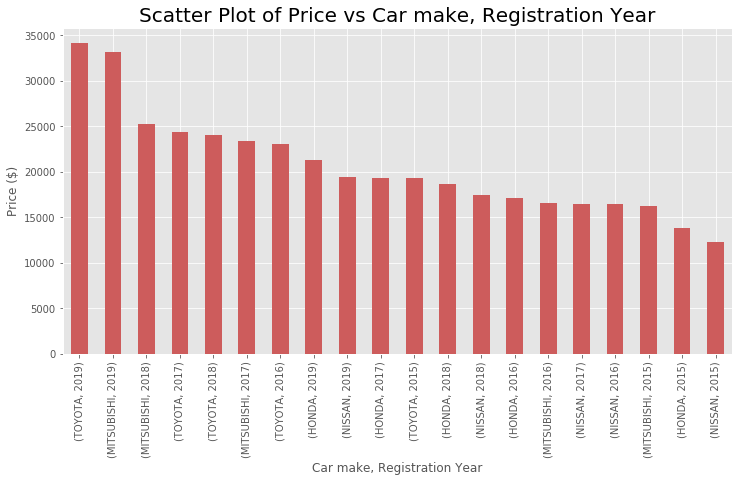

In [314]:
plt.figure(figsize=(12,6))
df_clean.groupby(['makes', 'registration_year'])['price'].median().sort_values(ascending = False).plot.bar(color='#CD5C5C')
plt.xlabel('Car make, Registration Year')
plt.ylabel('Price ($)')
plt.title('Scatter Plot of Price vs Car make, Registration Year', fontsize=20)

Text(0.5, 1.0, 'Scatter Plot of Price vs Car make, Steering')

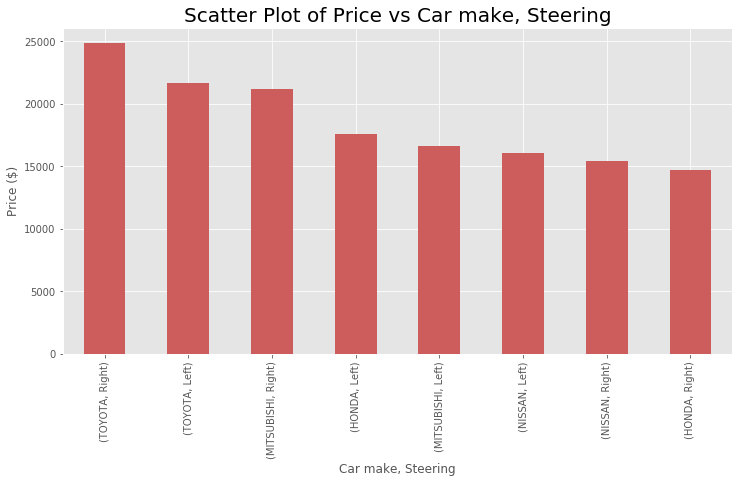

In [315]:
plt.figure(figsize=(12,6))
df_clean.groupby(['makes', 'steering'])['price'].median().sort_values(ascending = False).plot.bar(color='#CD5C5C')
plt.xlabel('Car make, Steering')
plt.ylabel('Price ($)')
plt.title('Scatter Plot of Price vs Car make, Steering', fontsize=20)

Text(0.5, 1.0, 'Scatter Plot of Price vs Car make, Drive')

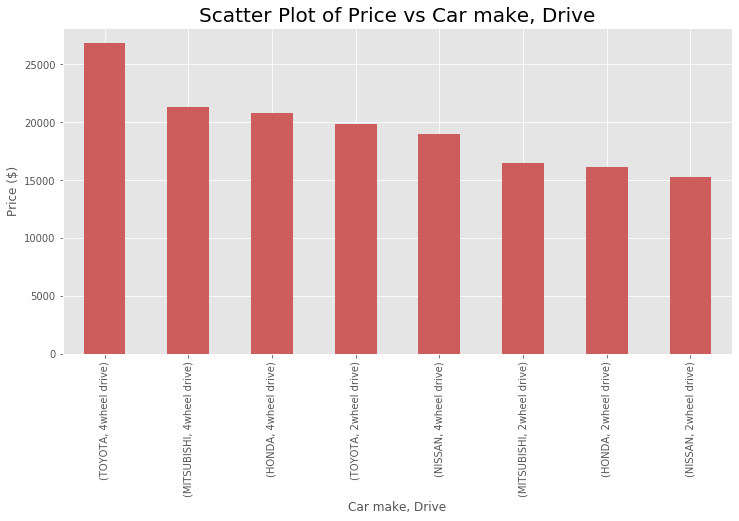

In [316]:
plt.figure(figsize=(12,6))
df_clean.groupby(['makes', 'drive'])['price'].median().sort_values(ascending = False).plot.bar(color='#CD5C5C')
plt.xlabel('Car make, Drive')
plt.ylabel('Price ($)')
plt.title('Scatter Plot of Price vs Car make, Drive', fontsize=20)

Text(0.5, 1.0, 'Scatter Plot of Price vs Car make, Transmission')

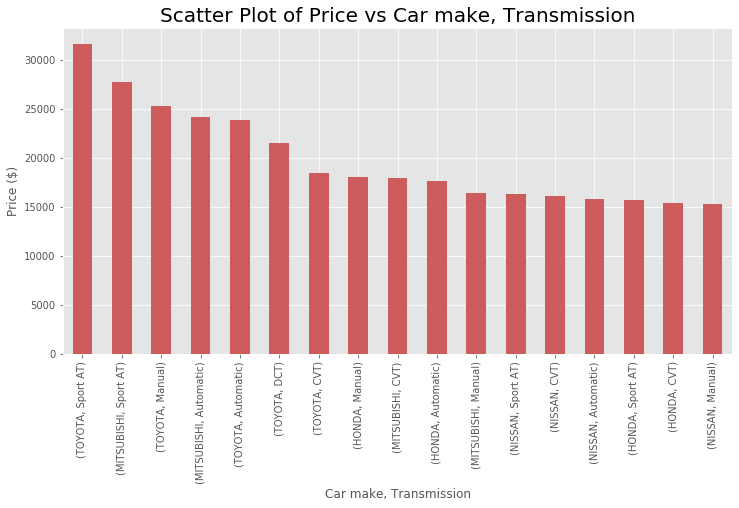

In [317]:
plt.figure(figsize=(12,6))
df_clean.groupby(['makes', 'transmission'])['price'].median().sort_values(ascending = False).plot.bar(color='#CD5C5C')
plt.xlabel('Car make, Transmission')
plt.ylabel('Price ($)')
plt.title('Scatter Plot of Price vs Car make, Transmission', fontsize=20)

Text(0.5, 1.0, 'Scatter Plot of Price vs Car make, Location')

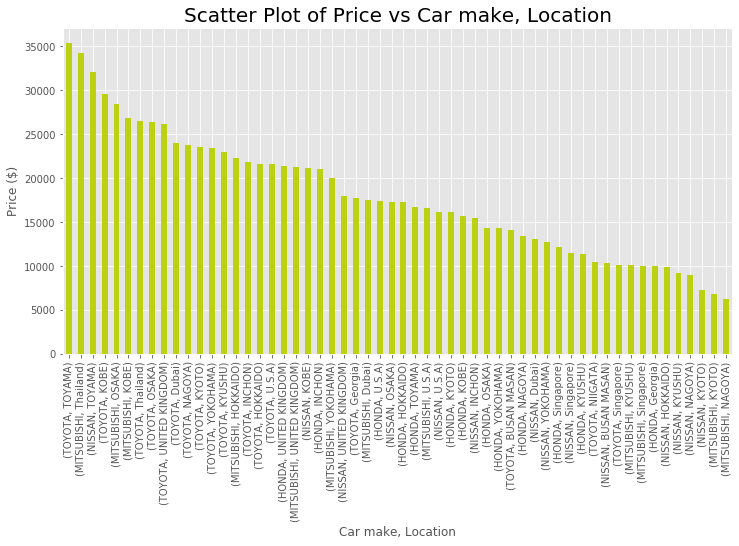

In [318]:
plt.figure(figsize=(12,6))
df_clean.groupby(['makes','location'])['price'].median().sort_values(ascending = False).plot.bar(color='#BDD113')
plt.xlabel('Car make, Location')
plt.ylabel('Price ($)')
plt.title('Scatter Plot of Price vs Car make, Location', fontsize=20)

In [319]:
df_clean.groupby('car make').agg([{'total':'count'}])

# dg = df.groupby('country').agg({'duration':'count','imdb_score':'mean'})
# dg[dg.duration>10].sort_values(ascending=False, by='imdb_score').plot(kind='bar',y='imdb_score', color='b')

/Users/babu/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/generic.py:840: FutureWarning:

using a dict on a Series for aggregation
is deprecated and will be removed in a future version



,location,chassis no,model code,milleage,engine size (cc),engine code,drive,steering,transmission,external color,registration_year,fuel,manufacture_year,price,makes
,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
,total,total,total,total,total,total,total,total,total,total,total,total,total,total,total
car make,,,,,,,,,,,,,,,
HONDA ACCORD,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74
HONDA ACCORD COUPE,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
HONDA ACTY TRUCK,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
HONDA ACTY VAN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
HONDA CIVIC,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63
HONDA CIVIC COUPE,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
HONDA CIVIC TYPE R,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [320]:
dg = df_clean.groupby('external color').agg({'car make':'count', 'price':'median'})
dg

,car make,price
external color,,
Beige,3,22098.0
Black,659,20200.0
Blue,221,17700.0
Brown,72,17649.5
Gold,6,25559.5
Gray,397,19819.0
Green,25,18700.0
Maroon,10,21754.0
Orange,4,18850.0


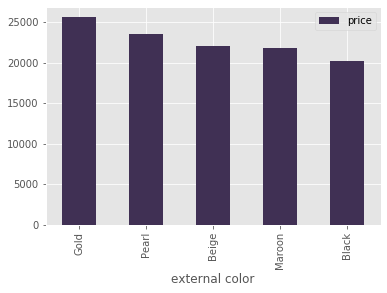

In [321]:
dg[dg.price > 20000].sort_values(ascending=False, by='price').plot(kind='bar', y='price', color='#403054')

In [322]:
engine_cc_df = df_clean.groupby(['car make','engine size (cc)'])[['milleage']].mean()
engine_cc_df

milleage
car make           engine size (cc)              
HONDA ACCORD       1500              43248.000000
                   1996              32062.000000
                   2354              52761.000000
                   2356              52734.814815
                   2400              39027.594595
                   3471              46461.000000
                   3500              36687.750000
HONDA ACCORD COUPE 1500              31490.000000
                   2400              32388.000000
HONDA ACTY TRUCK   650                3000.000000
HONDA ACTY VAN     650               54000.000000
HONDA CIVIC        1000               4049.750000
                   1500              24064.421053
                   1597              36400.000000
                   1598              33000.000000
                   1800              52859.400000
                   2000              27199.062500
                   2400              46825.000000
HONDA CIVIC COUPE  1500              46565.000000
                   1800              24696.000000
                   2000              22322.000000
HONDA CIVIC TYPE R 2000                932.000000
HONDA CR-V         1490               7000.000000
                   1600              46602.285714
                   2000              27405.392857
                   2200              79000.000000
                   2354              40682.272727
                   2400              50747.363636
HONDA CR-Z         1490              66100.000000
HONDA FIT          1300              37447.000000
...                                           ...
TOYOTA RUSH        1500                 10.000000
TOYOTA SEQUOIA     5700              20305.000000
TOYOTA SIENNA      3456              38682.875000
TOYOTA SIENTA      1490              29794.333333
                   1500              15755.625000
TOYOTA SPADE       1490              13385.500000
                   1500              25019.333333
TOYOTA SUCCEED     1500              69000.000000
TOYOTA SUCCEED VAN 1490              38300.000000
TOYOTA TACOMA      2700              86914.888889
                   3500              40579.769231
                   4000              97585.400000
TOYOTA TOYOACE     4000              58999.000000
TOYOTA TUNDRA      4600              72394.500000
                   5700              79659.071429
TOYOTA VELLFIRE    2490              33308.428571
                   2500              13217.400000
                   3450                401.000000
TOYOTA VITZ        990               42837.000000
                   1000              37000.000000
                   1300              12333.333333
                   1320              56392.500000
                   1329              22380.000000
                   1490              20000.000000
TOYOTA VOXY        1800              60369.000000
                   1980              38366.000000
                   2000              28065.750000
TOYOTA WISH        1798              37470.000000
                   1800              33171.333333
TOYOTA YARIS       1500              34746.333333

[358 rows x 1 columns]

In [323]:
low_cc_df = df_clean.groupby(['car make','engine size (cc)'])[['milleage']].mean().head(10)
low_cc_df

milleage
car make           engine size (cc)              
HONDA ACCORD       1500              43248.000000
                   1996              32062.000000
                   2354              52761.000000
                   2356              52734.814815
                   2400              39027.594595
                   3471              46461.000000
                   3500              36687.750000
HONDA ACCORD COUPE 1500              31490.000000
                   2400              32388.000000
HONDA ACTY TRUCK   650                3000.000000

In [324]:
high_cc_df = df_clean.groupby(['car make','engine size (cc)'])[['milleage']].mean().tail(10)
high_cc_df

milleage
car make     engine size (cc)              
TOYOTA VITZ  1300              12333.333333
             1320              56392.500000
             1329              22380.000000
             1490              20000.000000
TOYOTA VOXY  1800              60369.000000
             1980              38366.000000
             2000              28065.750000
TOYOTA WISH  1798              37470.000000
             1800              33171.333333
TOYOTA YARIS 1500              34746.333333

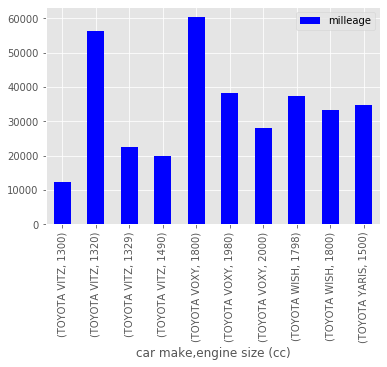

In [325]:
high_cc_df.plot.bar(color='b')

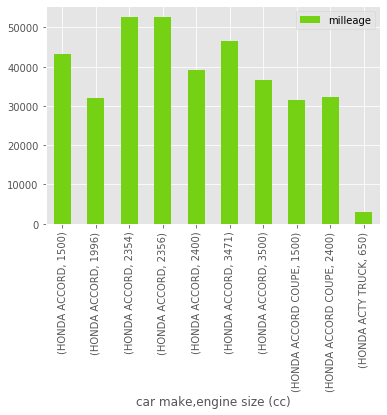

In [326]:
low_cc_df.plot.bar(color='#75D113')

Text(0, 0.5, 'Price')

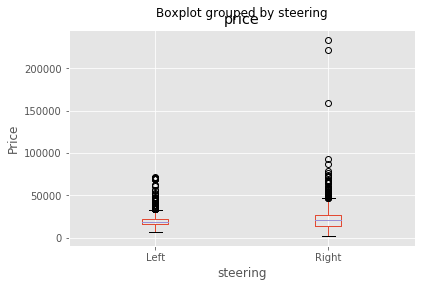

In [327]:
df_box = df_clean[['steering', 'price']]
df_box.boxplot(by='steering', column='price')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

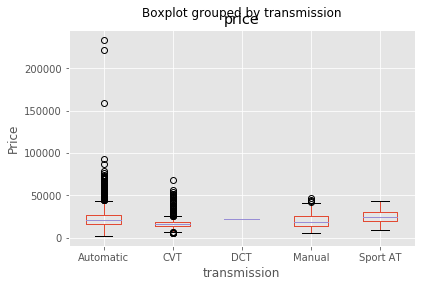

In [328]:
df_box_1 = df_clean[['transmission', 'price']]
df_box_1.boxplot(by='transmission', column='price')
plt.ylabel('Price')

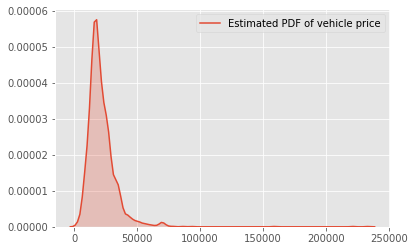

In [329]:
sns.kdeplot(df_clean['price'], shade=True, label='Estimated PDF of vehicle price')

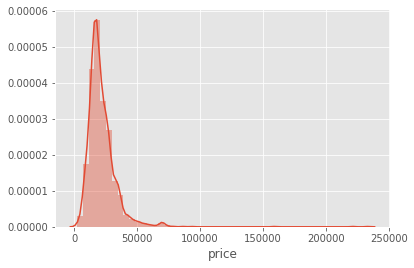

In [330]:
sns.distplot(df_clean['price'])

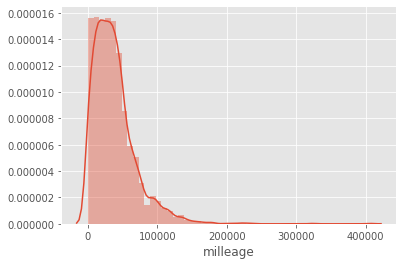

In [331]:
sns.distplot(df_clean['milleage'])

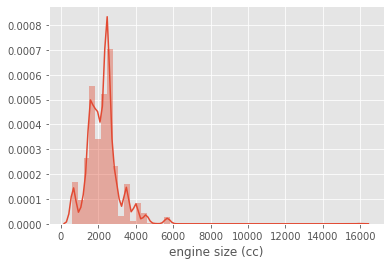

In [332]:
sns.distplot(df_clean['engine size (cc)'])

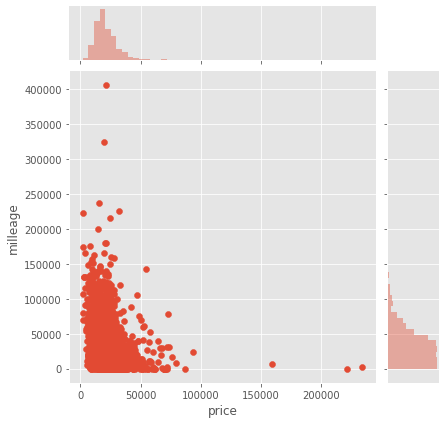

In [333]:
sns.jointplot(df_clean['price'], df_clean['milleage'])

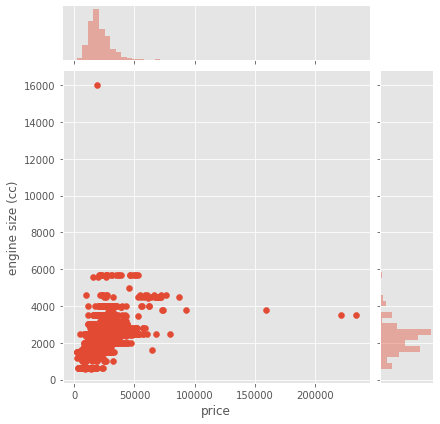

In [334]:
sns.jointplot(df_clean['price'], df_clean['engine size (cc)'])

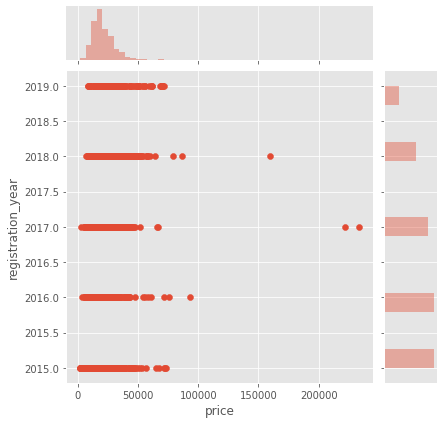

In [335]:
sns.jointplot(df_clean['price'], df_clean['registration_year'])

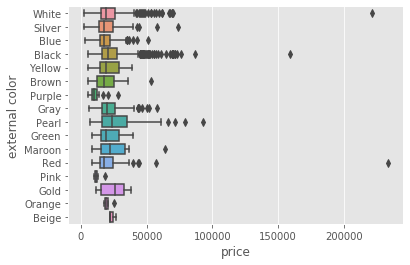

In [336]:
sns.boxplot(x='price', y='external color', data=df_clean)

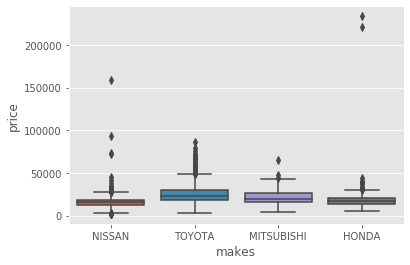

In [337]:
sns.boxplot(x='makes', y='price', data=df_clean)

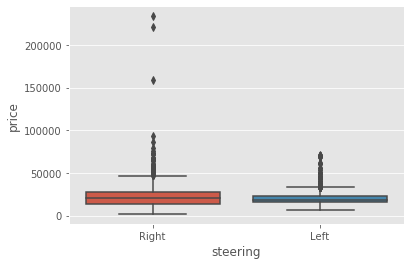

In [338]:
sns.boxplot(x='steering', y='price', data=df_clean)

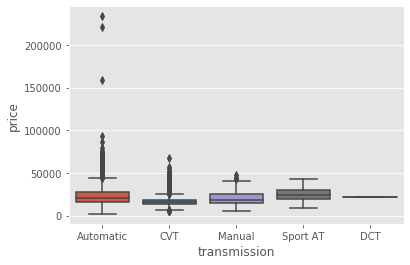

In [339]:
sns.boxplot(x='transmission', y='price', data=df_clean)

Text(0.5, 1, 'Graph (a)')

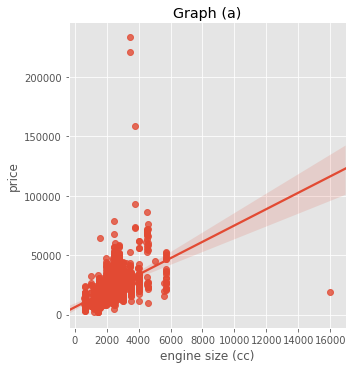

In [340]:
sns.lmplot("engine size (cc)", "price", df_clean)
ax = plt.gca()
ax.set_title("Graph (a)")

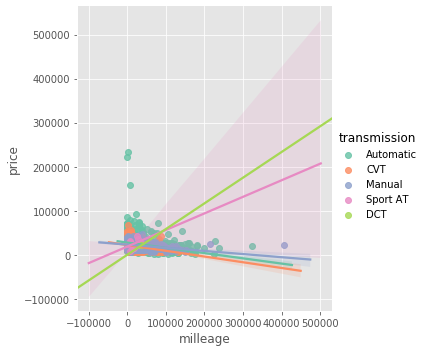

In [341]:
sns.lmplot("milleage", "price", df_clean, hue="transmission", palette="Set2")

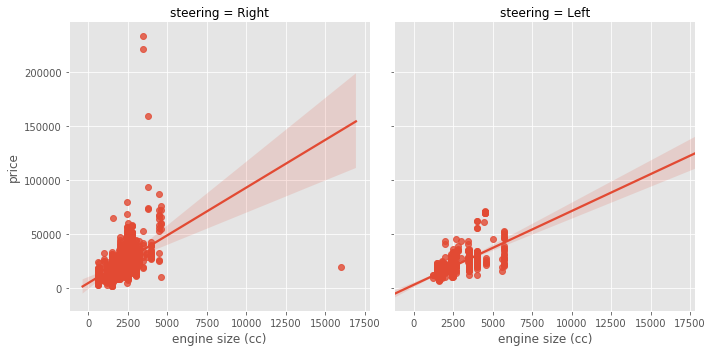

In [342]:
sns.lmplot("engine size (cc)", "price", df_clean, col="steering", palette="Set2")

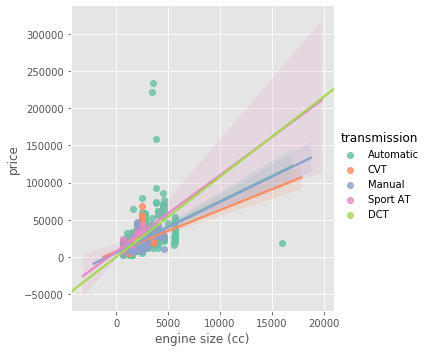

In [343]:
sns.lmplot("engine size (cc)", "price", df_clean, hue="transmission", palette="Set2")

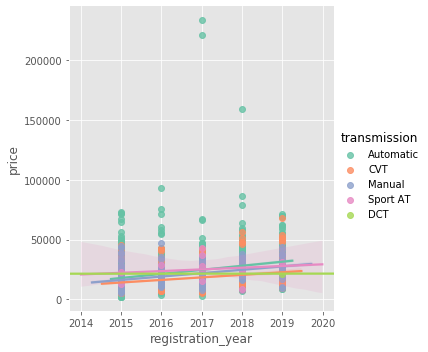

In [344]:
sns.lmplot("registration_year", "price", df_clean, hue="transmission", palette="Set2")

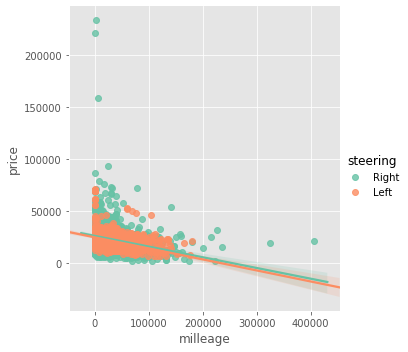

In [345]:
sns.lmplot("milleage", "price", df_clean, hue="steering", palette="Set2")

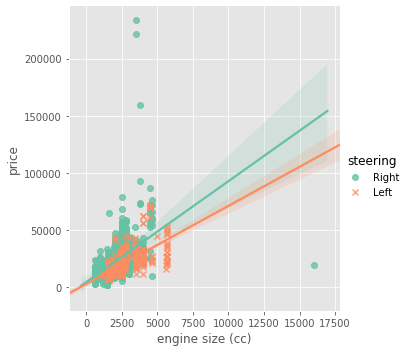

In [346]:
sns.lmplot("engine size (cc)", "price", df_clean, hue="steering",  markers= ["o", "x"], palette="Set2")

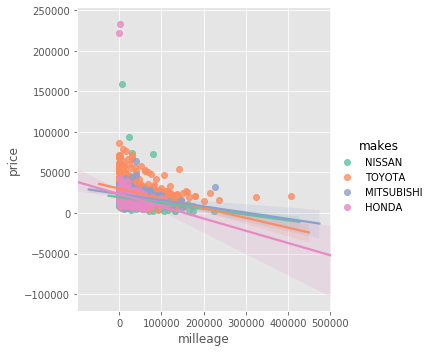

In [347]:
sns.lmplot("milleage", "price", df_clean, hue="makes", palette="Set2")

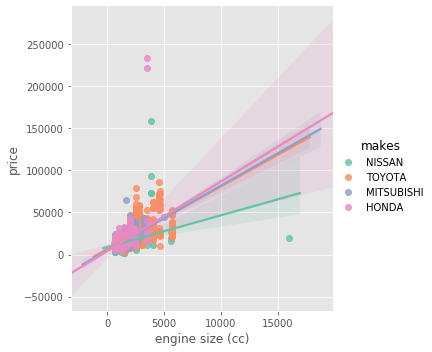

In [348]:
sns.lmplot("engine size (cc)", "price", df_clean, hue="makes", palette="Set2")

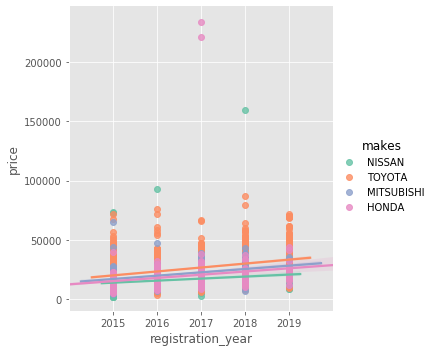

In [349]:
sns.lmplot("registration_year", "price", df_clean, hue="makes", palette="Set2")

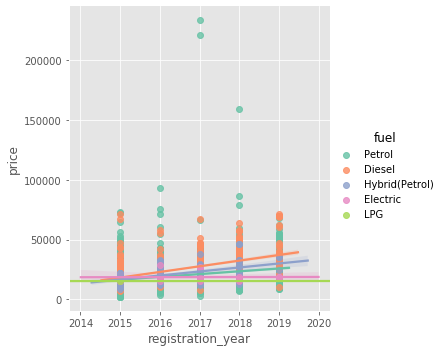

In [350]:
sns.lmplot("registration_year", "price", df_clean, hue="fuel", palette="Set2")

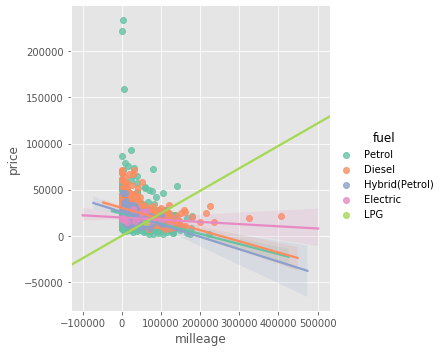

In [351]:
sns.lmplot("milleage", "price", df_clean, hue="fuel", palette="Set2")

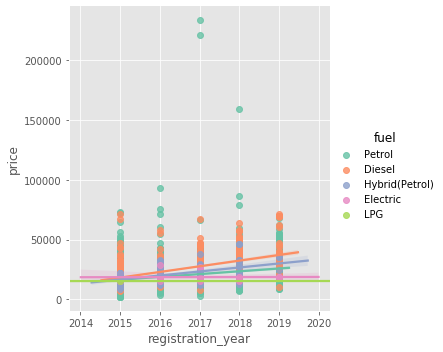

In [352]:
sns.lmplot("registration_year", "price", df_clean, hue="fuel", palette="Set2")

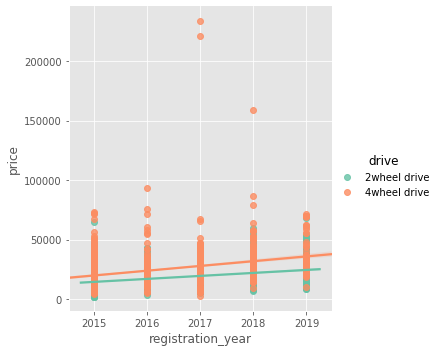

In [353]:
sns.lmplot("registration_year", "price", df_clean, hue="drive", palette="Set2")

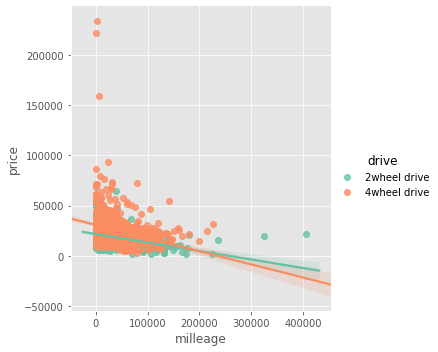

In [354]:
sns.lmplot("milleage", "price", df_clean, hue="drive", palette="Set2")

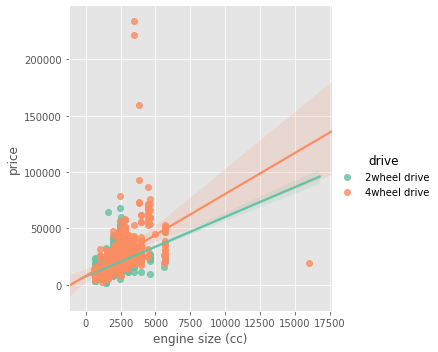

In [355]:
sns.lmplot("engine size (cc)", "price", df_clean, hue="drive", palette="Set2")

In [356]:
df_clean.columns.to_list()

['car make',
 'location',
 'chassis no',
 'model code',
 'milleage',
 'engine size (cc)',
 'engine code',
 'drive',
 'steering',
 'transmission',
 'external color',
 'registration_year',
 'fuel',
 'manufacture_year',
 'price',
 'makes']

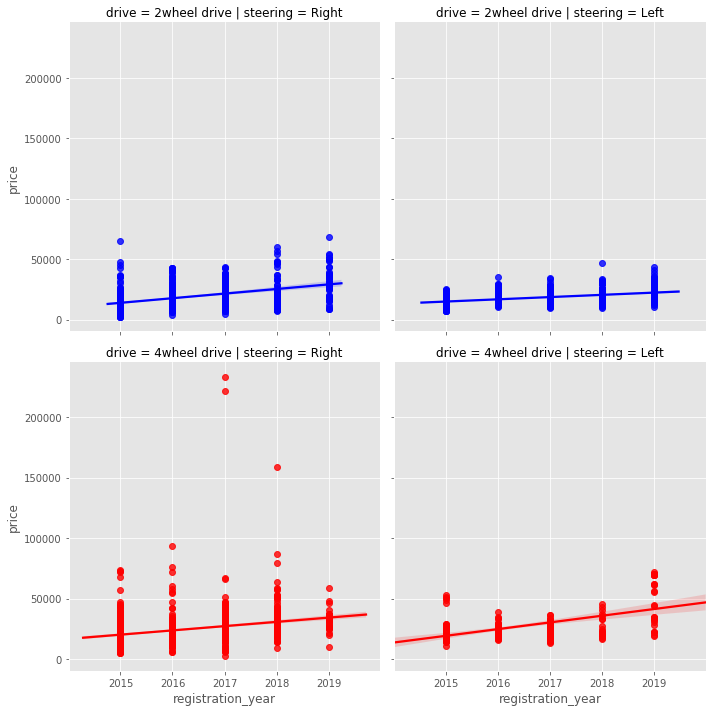

In [357]:
sns.lmplot("registration_year", "price", df_clean, hue="drive", palette={"2wheel drive": "b", "4wheel drive": "r"}, col='steering', row='drive')

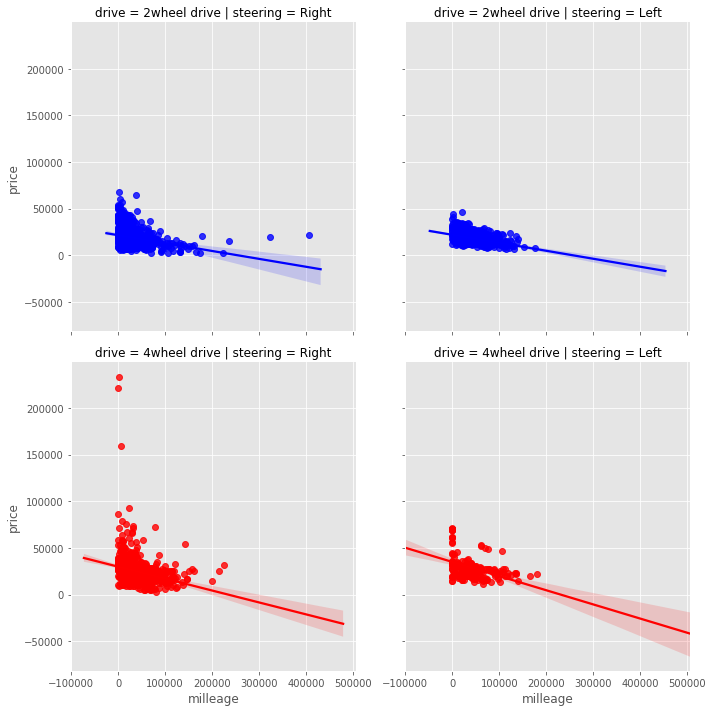

In [358]:
sns.lmplot("milleage", "price", df_clean, hue="drive", palette={"2wheel drive": "b", "4wheel drive": "r"}, col='steering', row='drive')



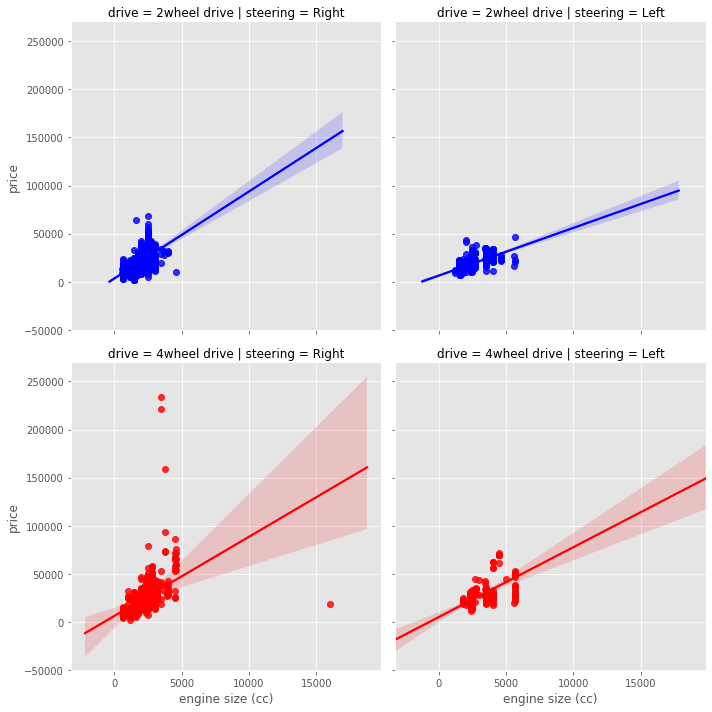

In [359]:
sns.lmplot("engine size (cc)", "price", df_clean, hue="drive", palette={"2wheel drive": "b", "4wheel drive": "r"}, col='steering', row='drive')



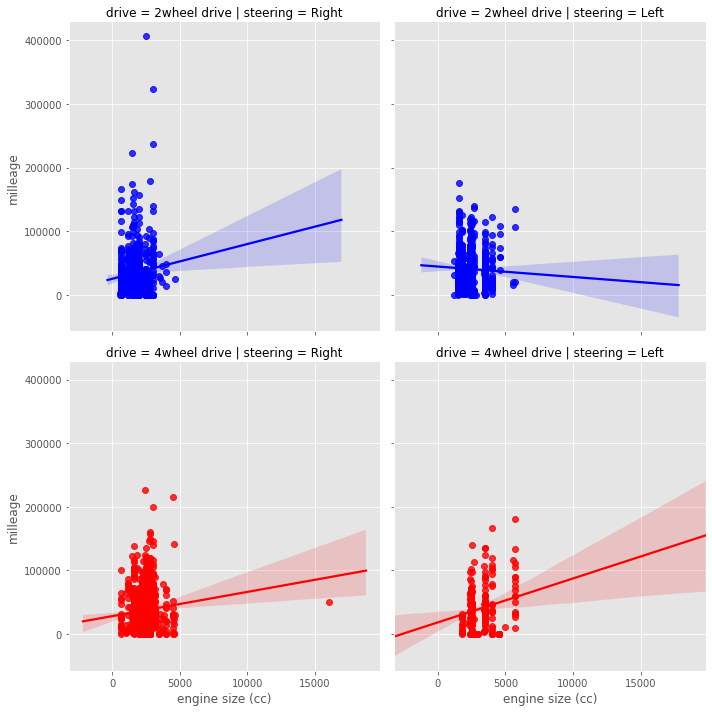

In [360]:
sns.lmplot("engine size (cc)", "milleage", df_clean, hue="drive", palette={"2wheel drive": "b", "4wheel drive": "r"}, col='steering', row='drive')


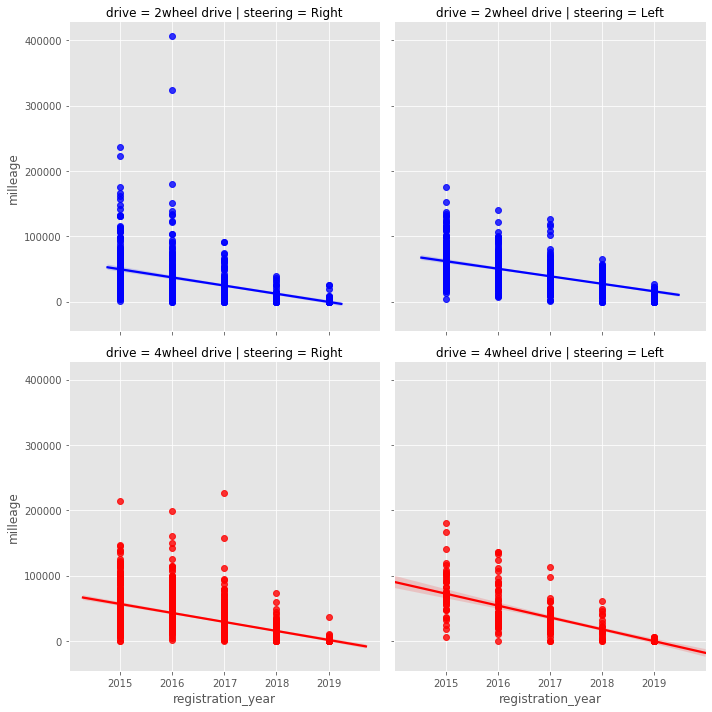

In [361]:
sns.lmplot("registration_year", "milleage", df_clean, hue="drive", palette={"2wheel drive": "b", "4wheel drive": "r"}, col='steering', row='drive')


/Users/babu/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



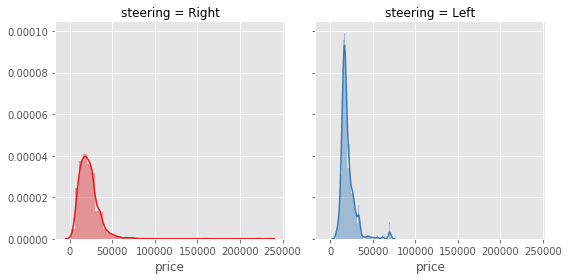

In [362]:
ColorGrid = sns.FacetGrid(df_clean, col='steering', hue="steering", palette="Set1", size=4)
ColorGrid.map(sns.distplot, "price")

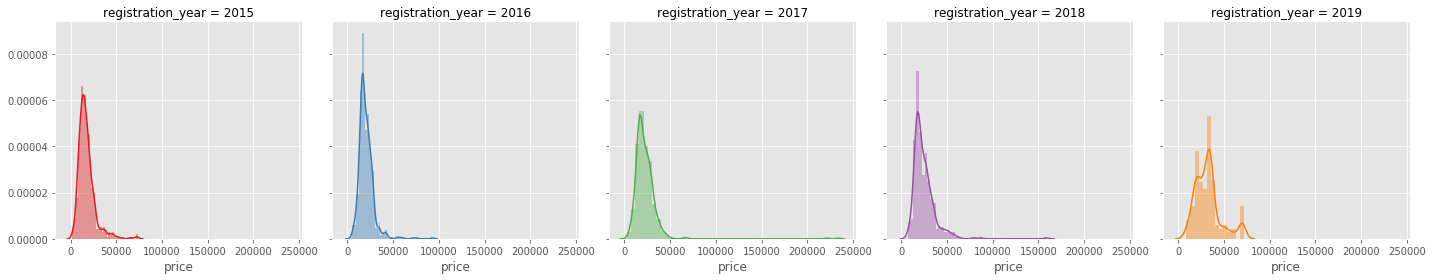

In [363]:
ColorGrid = sns.FacetGrid(df_clean, col='registration_year', hue="registration_year", palette="Set1", size=4)
ColorGrid.map(sns.distplot, "price")

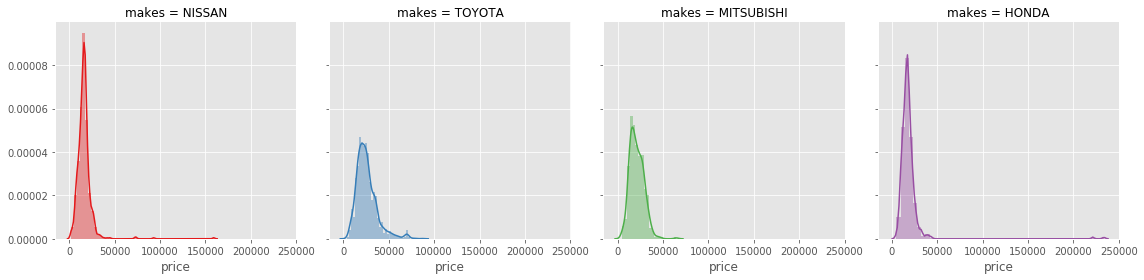

In [364]:
ColorGrid = sns.FacetGrid(df_clean, col='makes', hue="makes", palette="Set1", size=4)
ColorGrid.map(sns.distplot, "price")

In [365]:
import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)

In [366]:
from plotly.graph_objs import Figure, Histogram, Layout

min_ = df_clean['price'].min()
max_ = df_clean['price'].max()

data = [Histogram(x=df_clean['price'], 
                  xbins=dict(start=min_,
                             end=max_,
                             size=(max_-min_)/10))]
layout = Layout(title="Histogram of Prices of Cars",
                bargap=0.2)
fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig, show_link=False, image_width=600, image_height=400)

In [367]:
# df_clean_makes = df_clean.loc[df['makes'] == 'TOYOTA']['price']

# df_clean_make = df_clean.loc['makes']['price']
# comedy_imdb = df_genre.loc[df_genre.genres=='Comedy']['imdb_score']

# or
groups = df_clean[['makes','registration_year']].groupby('makes')
toyota_price = groups.get_group('TOYOTA').registration_year
nissan_price = groups.get_group('NISSAN').registration_year
honda_price = groups.get_group('HONDA').registration_year
mitsubishi_price = groups.get_group('MITSUBISHI').registration_year

getbins = lambda t:{'start':t.min(),'end':t.max(), 'size':0.5}

trace0 = Histogram(x=toyota_price,
                   name='Toyota',
                   xbins=getbins(toyota_price))

trace1 = Histogram(x=nissan_price,
                   name='Nissan',
                   xbins=getbins(nissan_price))

trace2 = Histogram(x=honda_price,
                   name='Honda',
                   xbins=getbins(honda_price))

trace3 = Histogram(x=mitsubishi_price,
                   name='Mitsubishi',
                   xbins=getbins(mitsubishi_price))

data = [trace0, trace1, trace2, trace3]

layout = Layout(title="Histogram of Toyota, Nissan Prices",
               bargroupgap=0.1)
fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig, show_link=False, image_width=600, image_height=400)

In [368]:
from plotly.graph_objs import Scatter


data = [Scatter(x=df_clean['external color'], y=df_clean['price'], mode = 'markers')]#, text=df['movie_title'])]
layout = Layout(title="Year vs Price")

fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig, show_link=False)

In [369]:
from plotly.graph_objs import Scatter


data = [Scatter(x=df_clean['engine size (cc)'], y=df_clean['price'], mode = 'markers')]#, text=df['movie_title'])]
layout = Layout(title="Year vs Price")

fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig, show_link=False)

In [370]:
from plotly.graph_objs import Bar

location_df = df_clean.groupby('location')['price'].median().sort_values(ascending=False).reset_index()

data = [Bar(x=location_df['location'], y=location_df['price'], text=location_df['location'])]
layout = Layout(title="Locations with Highest Median Price")

fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig,show_link=False)

In [371]:
wc = WordCloud(background_color="white", max_words=2000, width=800, height=400)
# generate word cloud
wc.generate(' '.join(df_clean['car make']))

In [372]:
df_clean.columns

Index(['car make', 'location', 'chassis no', 'model code', 'milleage',
       'engine size (cc)', 'engine code', 'drive', 'steering', 'transmission',
       'external color', 'registration_year', 'fuel', 'manufacture_year',
       'price', 'makes'],
      dtype='object')

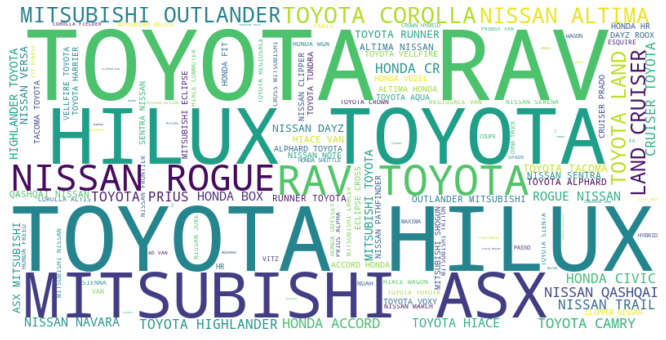

In [373]:
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()